<a href="https://colab.research.google.com/github/fernandoortiz5/mineracao-dados-faculdade/blob/main/kdd_wine_unifil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn matplotlib seaborn --quiet

# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Bibliotecas instaladas e importadas com sucesso!")


✅ Bibliotecas instaladas e importadas com sucesso!


In [6]:
url = "https://raw.githubusercontent.com/zygmuntz/wine-quality/refs/heads/master/winequality/winequality-red.csv"
# Site fora do Ar
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("\n🔍 Visão geral do dataset:")
display(df.head())

print("\n📊 Informações gerais:")
display(df.info())

print("\n📈 Estatísticas descritivas:")
display(df.describe())



🔍 Visão geral do dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



📊 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None


📈 Estatísticas descritivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Pré-processamento dos dados

# Tratamento de valores ausentes (não há valores nulos neste dataset)
print(f"Valores ausentes:\n{df.isnull().sum()}")

# Normalização e padronização dos dados
X = df.drop("quality", axis=1)  # Variáveis independentes (atributos físico-químicos)
y = df["quality"]              # Variável dependente (qualidade do vinho)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reclassificação da variável alvo (qualidade)
# Agrupando a qualidade em 3 categorias: baixa (3-5), média (6), alta (7-8)
y = y.apply(lambda x: 'baixa' if x <= 5 else ('média' if x == 6 else 'alta'))

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("\n✅ Dados pré-processados com sucesso!")


Valores ausentes:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

✅ Dados pré-processados com sucesso!



🔹 Relatório de Classificação - KNN:
              precision    recall  f1-score   support

        alta       0.47      0.57      0.52        65
       baixa       0.69      0.70      0.70       223
       média       0.54      0.49      0.51       192

    accuracy                           0.60       480
   macro avg       0.57      0.59      0.58       480
weighted avg       0.60      0.60      0.60       480



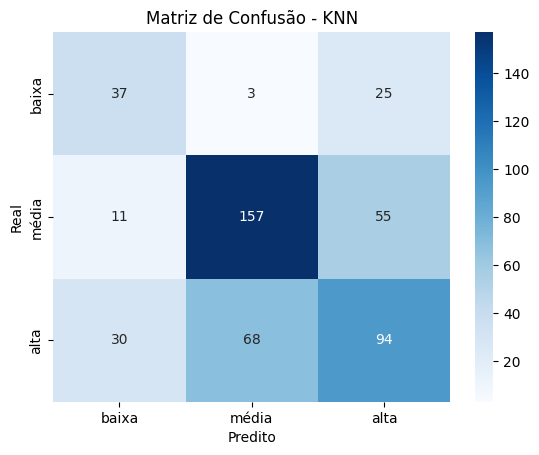

In [8]:
# Mineração de dados - Algoritmo 1: KNN

# Treinamento do modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliação do modelo KNN
y_pred_knn = knn.predict(X_test)
print("\n🔹 Relatório de Classificação - KNN:")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusão - KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Blues", xticklabels=['baixa', 'média', 'alta'], yticklabels=['baixa', 'média', 'alta'])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()



🔹 Relatório de Classificação - SVM:
              precision    recall  f1-score   support

        alta       0.66      0.35      0.46        65
       baixa       0.72      0.77      0.74       223
       média       0.58      0.63      0.60       192

    accuracy                           0.66       480
   macro avg       0.65      0.58      0.60       480
weighted avg       0.66      0.66      0.65       480



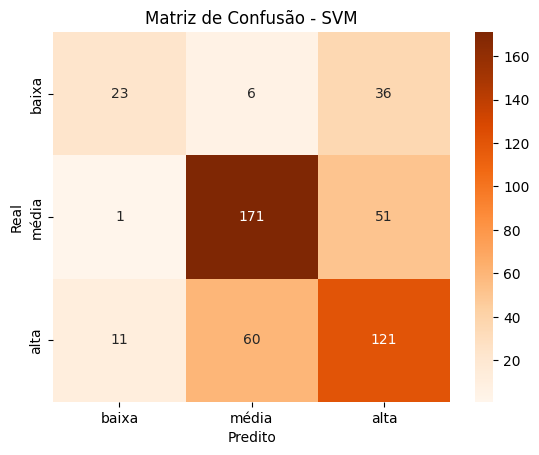

In [9]:
# Mineração de dados - Algoritmo 2: SVM

# Treinamento do modelo SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Avaliação do modelo SVM
y_pred_svm = svm.predict(X_test)
print("\n🔹 Relatório de Classificação - SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusão - SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Oranges", xticklabels=['baixa', 'média', 'alta'], yticklabels=['baixa', 'média', 'alta'])
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()



🔹 Acurácia dos Modelos:
KNN: 0.60
SVM: 0.66


<ipython-input-10-3bf6b4c97b3a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Acurácia", data=results, palette="viridis")


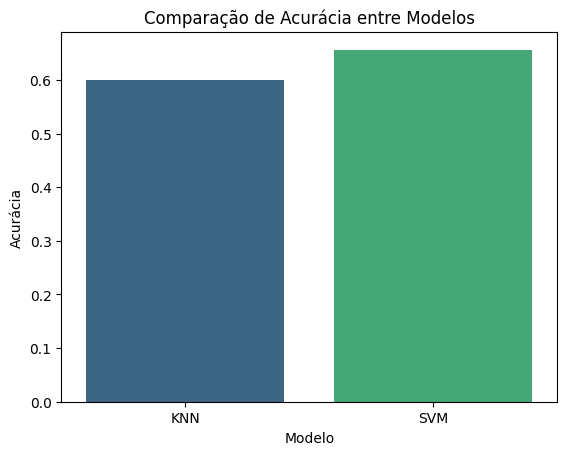

In [10]:
# Comparação dos resultados

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"\n🔹 Acurácia dos Modelos:")
print(f"KNN: {accuracy_knn:.2f}")
print(f"SVM: {accuracy_svm:.2f}")

results = pd.DataFrame({
    "Modelo": ["KNN", "SVM"],
    "Acurácia": [accuracy_knn, accuracy_svm]
})

sns.barplot(x="Modelo", y="Acurácia", data=results, palette="viridis")
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.show()
